In [26]:
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from netCDF4 import Dataset
%matplotlib inline

In [27]:
fileName = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/QS_data/qs_l2b_v4p1/qs_l2b_33345_v4.1_200511131602.nc'
xds = xr.open_dataset(fileName)

In [33]:
flag_meaning = [
    'adequate_sigma0_flag',
    'adequate_azimuth_diversity_flag',
    'poor_coastal_processing_flag',
    'wind_retrieval_likely_corrupted_flag',
    'coastal_flag',
    'ice_edge_flag',
    'winds_not_retrieved_flag',
    'high_wind_speed_flag',
    'low_wind_speed_flag',
    'rain_impact_flag_not_usable_flag',
    'rain_impact_flag',
    'missing_look_flag']

eflags_meaning = ['rain_correction_not_applied_flag',
                  'correction_produced_negative_spd_flag',
                  'all_ambiguities_contribute_to_nudging_flag', 
                  'large_rain_correction_flag', 
                  'coastal_processing_applied_flag', 
                  'lake_winds_flag', 
                  'rain_nearby_flag', 
                  'ice_nearby_flag', 
                  'significant_rain_correction_flag', 
                  'rain_correction_applied_flag', 
                  'wind_retrieval_possibly_corrupted_flag'] 

In [31]:
xds

<xarray.Dataset>
Dimensions:                           (along_track: 3248, cross_track: 152,
                                       ambiguities: 4)
Coordinates:
    lat                               (along_track, cross_track) float32 ...
    lon                               (along_track, cross_track) float32 ...
    num_ambiguities                   (along_track, cross_track) float32 ...
Dimensions without coordinates: along_track, cross_track, ambiguities
Data variables: (12/22)
    time                              (along_track) datetime64[ns] ...
    retrieved_wind_speed              (along_track, cross_track) float32 ...
    retrieved_wind_direction          (along_track, cross_track) float32 ...
    rain_impact                       (along_track, cross_track) float32 ...
    flags                             (along_track, cross_track) float32 ...
    eflags                            (along_track, cross_track) float32 ...
    ...                                ...
    number_in_aft                     (along_track, cross_track) float32 ...
    number_out_fore                   (along_track, cross_track) float32 ...
    number_out_aft                    (along_track, cross_track) float32 ...
    gmf_sst                           (along_track, cross_track) float32 ...
    distance_from_coast               (along_track, cross_track) float32 ...
    exp_bias_wrt_oceanward_neighbors  (along_track, cross_track) float32 ...
Attributes: (12/51)
    history:                     2017-358T02:01:33+0000 fore /home/fore/sds/v...
    processing_level:            L2B
    date_created:                2017-358T02:01:33
    cross_track_resolution:      12.5
    along_track_resolution:      12.5
    zero_index:                  76
    ...                          ...
    references:                  10.1109/TGRS.2012.2235843; 10.1109/TGRS.2014...
    InstrumentShortName:         SeaWinds
    ancillary_data_descriptors:  QS_PC2B0006.CP12\nQS_MC2B0001\nSNWP120053171...
    data_format_type:            netCDF-4
    version_id:                  V4.1
    GranulePointer:              qs_l2b_33345_v4.1_200511131602.nc

In [3]:
ds = Dataset(fileName)

In [19]:
eflags = np.unique(np.array(ds['eflags']))

In [20]:
eflags

array([   1,    5,   21, 2052, 4097, 4101, 4113, 4117, 4119, 4177, 4181,
       4183, 4353, 4357, 4369, 4373, 4375, 4417, 4421, 4433, 4437, 4439,
       4609, 4613, 4625, 4629, 4631, 4695, 4865, 4869, 4881, 4885, 4887,
       6164, 6404, 6660, 6916, 7172, 7180, 7188, 7196, 7198, 7252, 7260,
       7262, 7428, 7436, 7438, 7444, 7452, 7454, 7684, 7692, 7700, 7708,
       7940, 7948, 7964], dtype=int16)

In [24]:
xeflags = ['{:015b}'.format(val) for val in eflags]

In [25]:
xeflags

['000000000000001',
 '000000000000101',
 '000000000010101',
 '000100000000100',
 '001000000000001',
 '001000000000101',
 '001000000010001',
 '001000000010101',
 '001000000010111',
 '001000001010001',
 '001000001010101',
 '001000001010111',
 '001000100000001',
 '001000100000101',
 '001000100010001',
 '001000100010101',
 '001000100010111',
 '001000101000001',
 '001000101000101',
 '001000101010001',
 '001000101010101',
 '001000101010111',
 '001001000000001',
 '001001000000101',
 '001001000010001',
 '001001000010101',
 '001001000010111',
 '001001001010111',
 '001001100000001',
 '001001100000101',
 '001001100010001',
 '001001100010101',
 '001001100010111',
 '001100000010100',
 '001100100000100',
 '001101000000100',
 '001101100000100',
 '001110000000100',
 '001110000001100',
 '001110000010100',
 '001110000011100',
 '001110000011110',
 '001110001010100',
 '001110001011100',
 '001110001011110',
 '001110100000100',
 '001110100001100',
 '001110100001110',
 '001110100010100',
 '001110100011100',


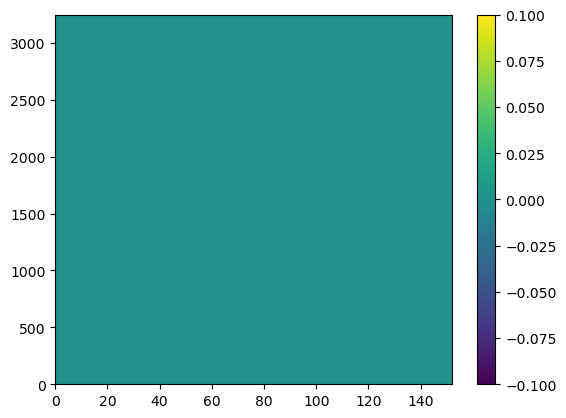

In [18]:
plt.pcolormesh(eflags - xeflags)
plt.colorbar()

In [ ]:
np.log(extended_flags)/np.log(2)